In [1]:
#%% Importar librerias
!pip install pydotplus
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Para mostrar el arbol de decision
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from IPython.display import Image  
import pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------- --------------------- 122.9/278.7 kB 2.4 MB/s eta 0:00:01
     ----------------------------- -------- 215.0/278.7 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24600 sha256=a45f5b03f85d3d123dae04a2125419376d74bd2b97fcc82a878623d5e56570c3
  Stored in directory: c:\users\p\appdata\local\pip\cache\wheels\69\b2\67\08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\P\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [15]:
df = pd.read_csv('estrellas.csv')
print(df.columns)


Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')


In [16]:
print(df.isnull().sum())


Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64


In [17]:
print(df['Spectral Class'].value_counts())

Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64


In [18]:
# %% Separar en train y test
X = df.drop(columns='Spectral Class')
y = df['Spectral Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#%% Dividir train en train y validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# No tenemos datos faltantes

In [19]:
# Ver los tipos de dato de cada columna
print(df.dtypes)

Temperature (K)              int64
Luminosity (L/Lo)          float64
Radius (R/Ro)              float64
Absolute magnitude (Mv)    float64
Star type                    int64
Star category               object
Star color                  object
Spectral Class              object
dtype: object


In [20]:
#%% Preprocesar variables categoricas
def preprocesar_variables_categoricas(data):
    '''Preprocesar variables categoricas'''
    # Obtener dummies de columnas Star category y Star color
    dummies = pd.get_dummies(data[['Star category', 'Star color']])
    # Eliminar columnas originales
    data.drop(columns=['Star category', 'Star color'], inplace=True)
    # Concatenar dummies
    data = pd.concat([data, dummies], axis=1)
    return data

X_train = preprocesar_variables_categoricas(X_train)
X_val = preprocesar_variables_categoricas(X_val)
X_test = preprocesar_variables_categoricas(X_test)

In [21]:
#%% Normalizar datos
def normalizar_datos(data):
    '''Normalizar datos'''
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    return data

X_train = normalizar_datos(X_train)
X_val = normalizar_datos(X_val)
X_test = normalizar_datos(X_test)

In [22]:
# %% Entrenar modelo DecisionTree
modelo_decision_tree = DecisionTreeClassifier()
modelo_decision_tree.fit(X_train, y_train)
y_pred = modelo_decision_tree.predict(X_val)

# %% Mostrar arbol de decision
dot_data = StringIO()
export_graphviz(modelo_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol_decision.png')
Image(graph.create_png())

#%% Evaluar accuracy, precision, recall y F1
def obtener_metricas_evaluacion(y_real, y_predicho):
    '''Obtener metricas de evaluacion'''
    print('Accuracy:', accuracy_score(y_real, y_predicho))
    print('Precision:', precision_score(y_real, y_predicho))
    print('Recall:', recall_score(y_real, y_predicho))
    print('F1:', f1_score(y_real, y_predicho))
    
    matrix_confusion = confusion_matrix(y_real, y_predicho)
    sns.heatmap(matrix_confusion, annot=True, fmt='d')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()
    
obtener_metricas_evaluacion(y_val, y_pred)

ValueError: X has 21 features, but DecisionTreeClassifier is expecting 25 features as input.

   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300         0.1020                    18.70   
3             2800           0.000200         0.1600                    16.65   
4             1939           0.000138         0.1030                    20.06   

   Star type Star category Star color Spectral Class  
0          0   Brown Dwarf        Red              M  
1          0   Brown Dwarf        Red              M  
2          0   Brown Dwarf        Red              M  
3          0   Brown Dwarf        Red              M  
4          0   Brown Dwarf        Red              M  
Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star colo

C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.8444444444444444
Recall: 0.8888888888888888
F1: 0.8641975308641975


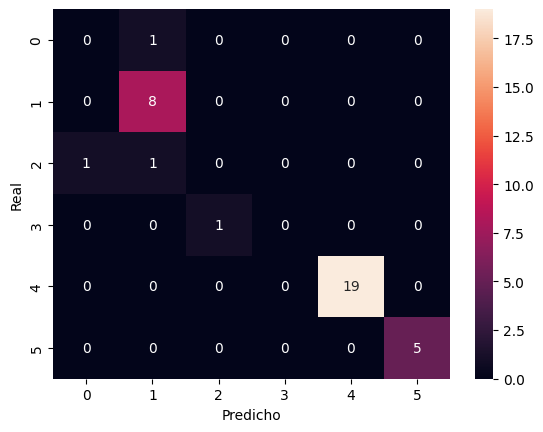


Entrenando modelo: Random Forest
Accuracy: 0.8611111111111112
Precision: 0.8421717171717172
Recall: 0.8611111111111112
F1: 0.8375974658869396


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


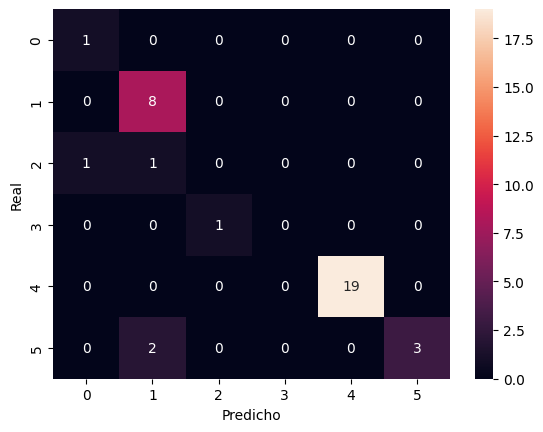


Entrenando modelo: SVM
Accuracy: 0.9722222222222222
Precision: 0.9583333333333334
Recall: 0.9722222222222222
F1: 0.9629629629629629


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


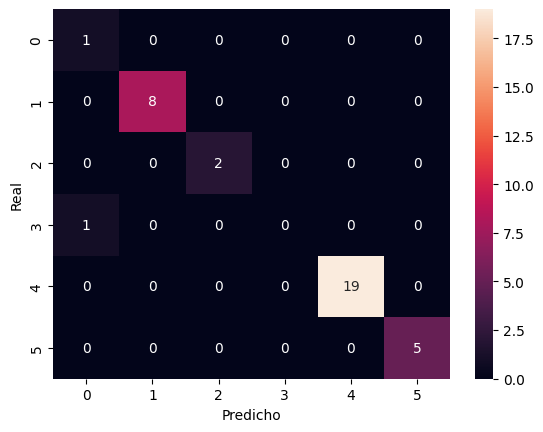


Evaluación en el conjunto de testeo con el mejor modelo:
Accuracy: 0.9166666666666666
Precision: 0.8801062091503268
Recall: 0.9166666666666666
F1: 0.8902356902356902


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


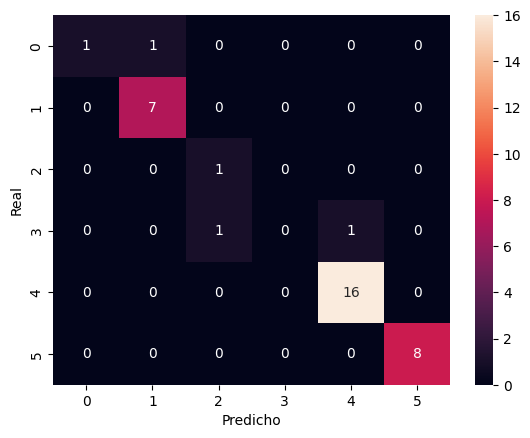

In [8]:
#%% Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos supervisados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#%% Leer el CSV de estrellas
data = pd.read_csv('estrellas.csv')
print(data.head())

#%% Evaluar datos faltantes
print(data.isnull().sum())

# %% Separar características (X) y la variable objetivo (y)
X = data.drop(columns='Spectral Class')
y = data['Spectral Class']

#%% Dividir en conjuntos de entrenamiento, validación y testeo
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# %% Preprocesar variables categóricas
# Aplicar one-hot encoding a X_train
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurar que X_val y X_test tengan las mismas columnas que X_train
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#%% Normalizar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#%% Función para calcular métricas de evaluación
def obtener_metricas_evaluacion(y_real, y_predicho):
    print('Accuracy:', accuracy_score(y_real, y_predicho))
    print('Precision:', precision_score(y_real, y_predicho, average='weighted'))
    print('Recall:', recall_score(y_real, y_predicho, average='weighted'))
    print('F1:', f1_score(y_real, y_predicho, average='weighted'))
    
    matrix_confusion = confusion_matrix(y_real, y_predicho)
    sns.heatmap(matrix_confusion, annot=True, fmt='d')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

#%% Crear, entrenar y evaluar modelos
modelos = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10),
    "SVM": SVC(C=1.0, kernel='linear')
}

for nombre, modelo in modelos.items():
    print(f"\nEntrenando modelo: {nombre}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_val)
    obtener_metricas_evaluacion(y_val, y_pred)

#%% Selección del mejor modelo y evaluación en el conjunto de testeo
# Suponiendo que Random Forest es el mejor modelo tras analizar las métricas
mejor_modelo = RandomForestClassifier(n_estimators=120, max_depth=12)
mejor_modelo.fit(X_train, y_train)
y_pred_test = mejor_modelo.predict(X_test)

print("\nEvaluación en el conjunto de testeo con el mejor modelo:")
obtener_metricas_evaluacion(y_test, y_pred_test)

Columnas en el dataset: Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')

Entrenando y evaluando modelos:

Modelo: Decision Tree
Accuracy: 0.8888888888888888
Precision: 0.8444444444444444
Recall: 0.8888888888888888
F1: 0.8641975308641975


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


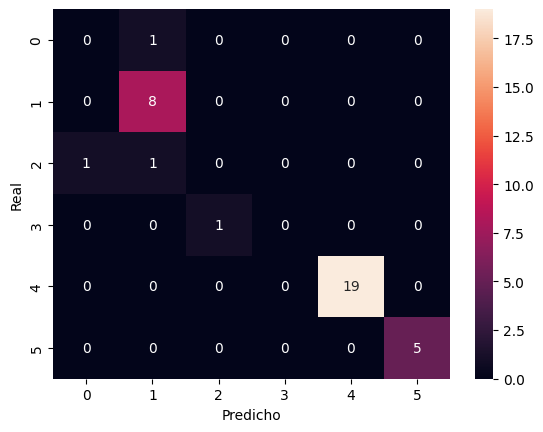


Modelo: Random Forest
Accuracy: 0.9166666666666666
Precision: 0.9393939393939394
Recall: 0.9166666666666666
F1: 0.9116715399610137


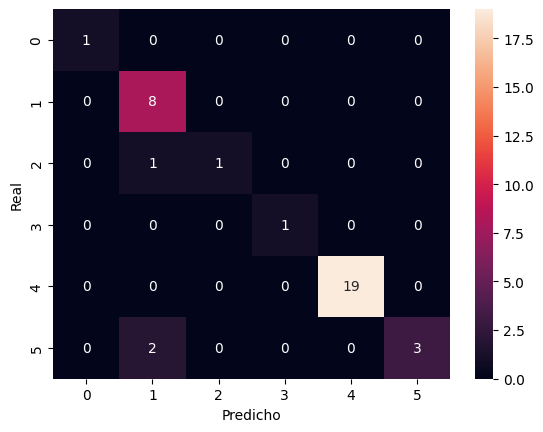


Modelo: SVM
Accuracy: 0.9722222222222222
Precision: 0.9583333333333334
Recall: 0.9722222222222222
F1: 0.9629629629629629


C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


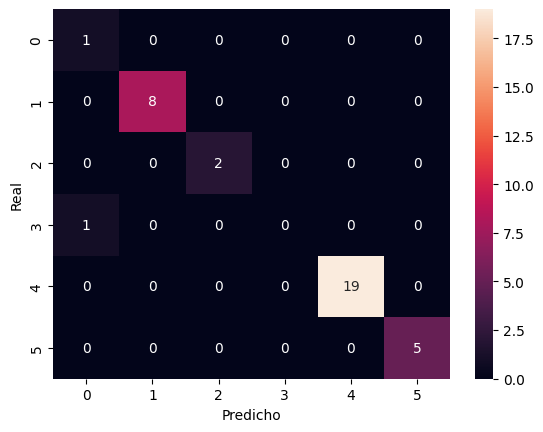

In [7]:
#%% Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos supervisados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#%% Leer el CSV de estrellas
data = pd.read_csv('estrellas.csv')
print("Columnas en el dataset:", data.columns)

# Ajustar el nombre de la columna objetivo si es necesario
# Aquí se asegura que la columna objetivo sea 'Spectral Class'
X = data.drop(columns='Spectral Class')  # Ajusta el nombre si difiere
y = data['Spectral Class']  # Ajusta el nombre si difiere

#%% Dividir en conjuntos de entrenamiento, validación y testeo
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# %% Preprocesar variables categóricas
# Aplicar one-hot encoding a X_train
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurar que X_val y X_test tengan las mismas columnas que X_train
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#%% Normalizar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#%% Función para calcular métricas de evaluación
def obtener_metricas_evaluacion(y_real, y_predicho):
    print('Accuracy:', accuracy_score(y_real, y_predicho))
    print('Precision:', precision_score(y_real, y_predicho, average='weighted'))
    print('Recall:', recall_score(y_real, y_predicho, average='weighted'))
    print('F1:', f1_score(y_real, y_predicho, average='weighted'))
    
    matrix_confusion = confusion_matrix(y_real, y_predicho)
    sns.heatmap(matrix_confusion, annot=True, fmt='d')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

#%% Crear, entrenar y evaluar modelos
modelos = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10),
    "SVM": SVC(C=1.0, kernel='linear')
}

print("\nEntrenando y evaluando modelos:")
for nombre, modelo in modelos.items():
    print(f"\nModelo: {nombre}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_val)
    obtener_metricas_evaluacion(y_val, y_pred)



In [ ]:
#%% Ajustar hiperparámetros de cada modelo y evaluar
print("\nAjuste de hiperparámetros y reevaluación de modelos:")
modelos_ajustados = {
    "Decision Tree Ajustado": DecisionTreeClassifier(max_depth=7, min_samples_split=5),
    "Random Forest Ajustado": RandomForestClassifier(n_estimators=120, max_depth=12),
    "SVM Ajustado": SVC(C=0.5, kernel='rbf')
}

for nombre, modelo in modelos_ajustados.items():
    print(f"\nModelo: {nombre}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_val)
    obtener_metricas_evaluacion(y_val, y_pred)

#%% Selección del mejor modelo y evaluación en el conjunto de testeo
# Suponiendo que Random Forest Ajustado es el mejor modelo tras analizar las métricas
mejor_modelo = RandomForestClassifier(n_estimators=120, max_depth=12)
mejor_modelo.fit(X_train, y_train)
y_pred_test = mejor_modelo.predict(X_test)

print("\nEvaluación en el conjunto de testeo con el mejor modelo:")
obtener_metricas_evaluacion(y_test, y_pred_test)